### Name- Bharat Bishnoi
### Reg no -21BCE5218

### EX 6 Clustering (Partitional, Hierarchical, Density)

# Partitional Clustering

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
dataset_path=(r"/Users/bharatbishnoi/Desktop/clustering.csv")
clustering_data = pd.read_csv(dataset_path)

# Exclude the 'ID' column for clustering
X_clustering = clustering_data.drop('ID  ', axis=1).values

In [27]:

def partitional_clustering(X, num_clusters=3, max_iter=8):
    # Step 1: Initialize centroids randomly from the dataset points
    indices = np.random.choice(X.shape[0], num_clusters, replace=False)
    centroids = X[indices, :]
    
    for iteration in range(max_iter):
        # Assignment step
        clusters = {}
        for xi in X:
            distances = [np.linalg.norm(xi - centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            if cluster_index not in clusters:
                clusters[cluster_index] = []
            clusters[cluster_index].append(xi)
        
        # Visualization part
        plt.figure(figsize=(8, 6))
        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        for cluster_index, points in clusters.items():
            points = np.array(points)
            plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[cluster_index], label=f'Cluster {cluster_index}')
        for i, centroid in enumerate(centroids):
            plt.scatter(centroid[0], centroid[1], color='black', marker='x', s=130, lw=3)
        plt.title(f'Iteration {iteration + 1}')
        plt.legend()
        plt.show()
        
        # Update step
        new_centroids = []
        for i in range(num_clusters):
            new_centroids.append(np.mean(clusters[i], axis=0))
        
        # Check for convergence (if centroids do not change)
        if np.all(np.array(new_centroids) == np.array(centroids)):
            break
        centroids = new_centroids
    
    return centroids, clusters


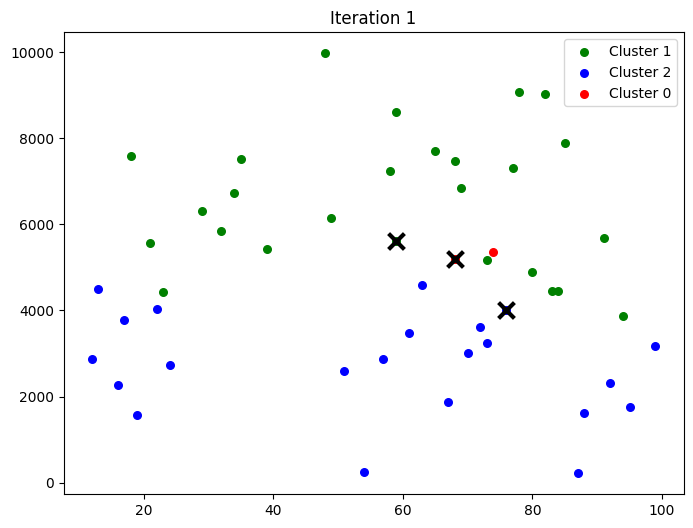

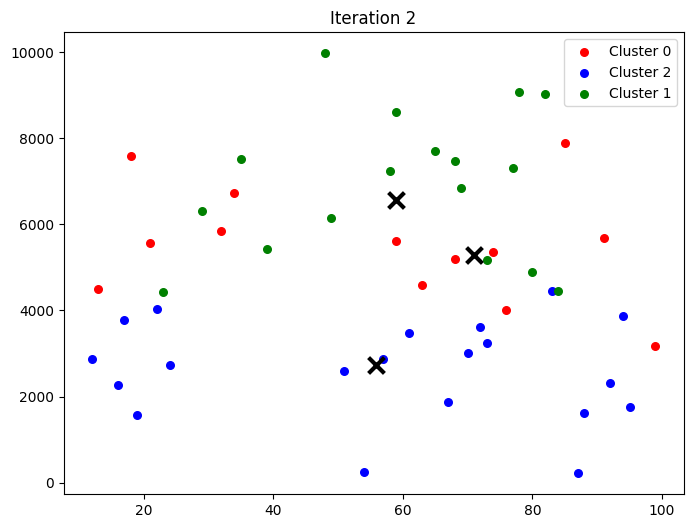

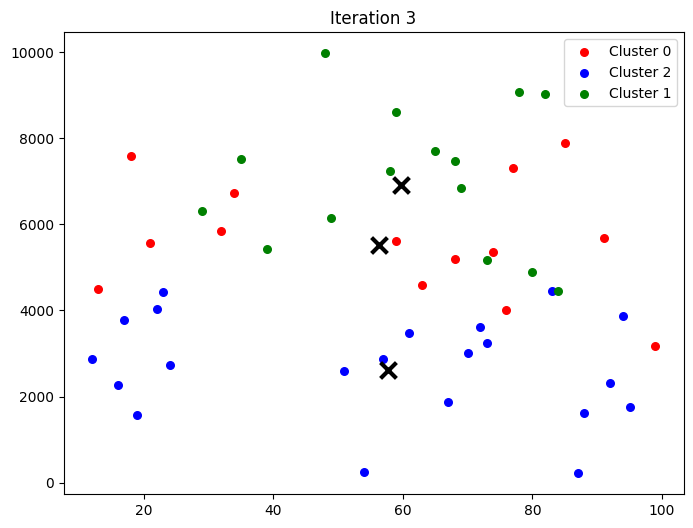

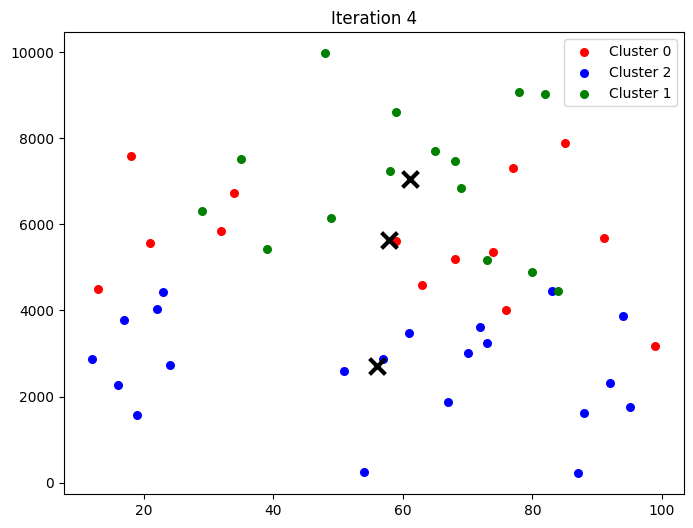

[array([  57.85714286, 5647.28571429, 2152.64285714,   44.92857143,
         185.14285714]),
 array([  61.06666667, 7054.4       , 5992.53333333,   46.86666667,
         177.53333333]),
 array([  56.04761905, 2707.14285714, 4796.23809524,   44.38095238,
         153.61904762])]

In [28]:
final_centroids, final_clusters = partitional_clustering(X_clustering, num_clusters=3, max_iter=8)
final_centroids  # Show final centroids after all iterations

In [29]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def maximum_norm(x, y):
    return np.max(np.abs(x - y))

def mahalanobis_distance(x, y, IV):
    return np.sqrt((x - y).T @ IV @ (x - y))

def inner_product_distance(x, y):
    # Convert to distance
    return -np.inner(x, y)

def hamming_distance(x, y):
    # Assuming x and y are binary
    return np.sum(x != y) / len(x)


In [30]:
# Pre-compute the inverse covariance matrix for the Mahalanobis distance
IV = np.linalg.inv(np.cov(X_clustering.T))

# Calculate pairwise distances using each metric
euclidean_distances = []
manhattan_distances = []
maximum_norm_distances = []
mahalanobis_distances = []
inner_product_distances = []
hamming_distances = []

for i in range(len(X_clustering)):
    for j in range(i + 1, len(X_clustering)):  # Avoid repeat and self-comparison
        xi, xj = X_clustering[i], X_clustering[j]
        euclidean_distances.append(euclidean_distance(xi, xj))
        manhattan_distances.append(manhattan_distance(xi, xj))
        maximum_norm_distances.append(maximum_norm(xi, xj))
        mahalanobis_distances.append(mahalanobis_distance(xi, xj, IV))
        inner_product_distances.append(inner_product_distance(xi, xj))
        # For Hamming distance, ensure our data is suitable (binary/categorical)
        hamming_distances.append(hamming_distance(xi, xj))

print('Euclidean distance:', np.mean(euclidean_distances))
print('Manhattan distance:', np.mean(manhattan_distances))
print('Maximum norm distance:', np.mean(maximum_norm_distances))
print('Mahalanobis distance:', np.mean(mahalanobis_distances))
print('Inner product distance (negated):', np.mean(inner_product_distances))
print('Hamming distance:', np.mean(hamming_distances))


Euclidean distance: 4103.215726062259
Manhattan distance: 5419.048163265306
Maximum norm distance: 3662.6726530612245
Mahalanobis distance: 3.0469095658511898
Inner product distance (negated): -42691231.17714286
Hamming distance: 0.9955918367346938


# Hierarchical Clustering

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage


def agglomerative_clustering(X, linkage_method='single'):
    # Perform hierarchical/agglomerative clustering
    linked = linkage(X, method=linkage_method)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Agglomerative Hierarchical Clustering Dendrogram ({linkage_method} linkage)')
    plt.show()

    return linked  # Return the linked matrix for further use


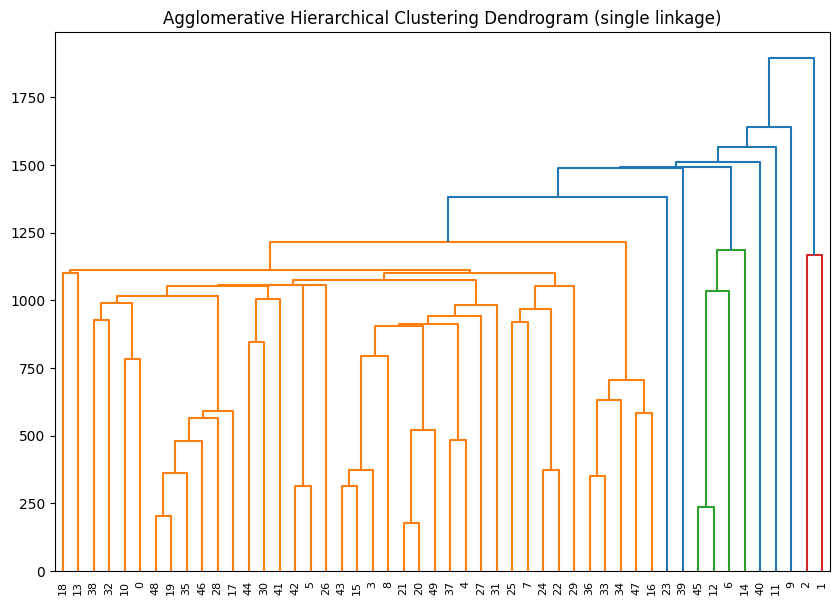

array([[2.00000000e+01, 2.10000000e+01, 1.77839816e+02, 2.00000000e+00],
       [1.90000000e+01, 4.80000000e+01, 2.02546291e+02, 2.00000000e+00],
       [1.20000000e+01, 4.50000000e+01, 2.37709907e+02, 2.00000000e+00],
       [1.50000000e+01, 4.30000000e+01, 3.14020700e+02, 2.00000000e+00],
       [5.00000000e+00, 4.20000000e+01, 3.14596567e+02, 2.00000000e+00],
       [3.30000000e+01, 3.60000000e+01, 3.50598060e+02, 2.00000000e+00],
       [3.50000000e+01, 5.10000000e+01, 3.60617526e+02, 3.00000000e+00],
       [3.00000000e+00, 5.30000000e+01, 3.71363703e+02, 3.00000000e+00],
       [2.20000000e+01, 2.40000000e+01, 3.72989276e+02, 2.00000000e+00],
       [4.60000000e+01, 5.60000000e+01, 4.80946983e+02, 4.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 4.84014463e+02, 2.00000000e+00],
       [4.90000000e+01, 5.00000000e+01, 5.20273005e+02, 3.00000000e+00],
       [2.80000000e+01, 5.90000000e+01, 5.64052303e+02, 5.00000000e+00],
       [1.60000000e+01, 4.70000000e+01, 5.82350410e

In [32]:
# Assuming X_clustering is our dataset excluding the 'ID' column
agglomerative_clustering(X_clustering, linkage_method='single')


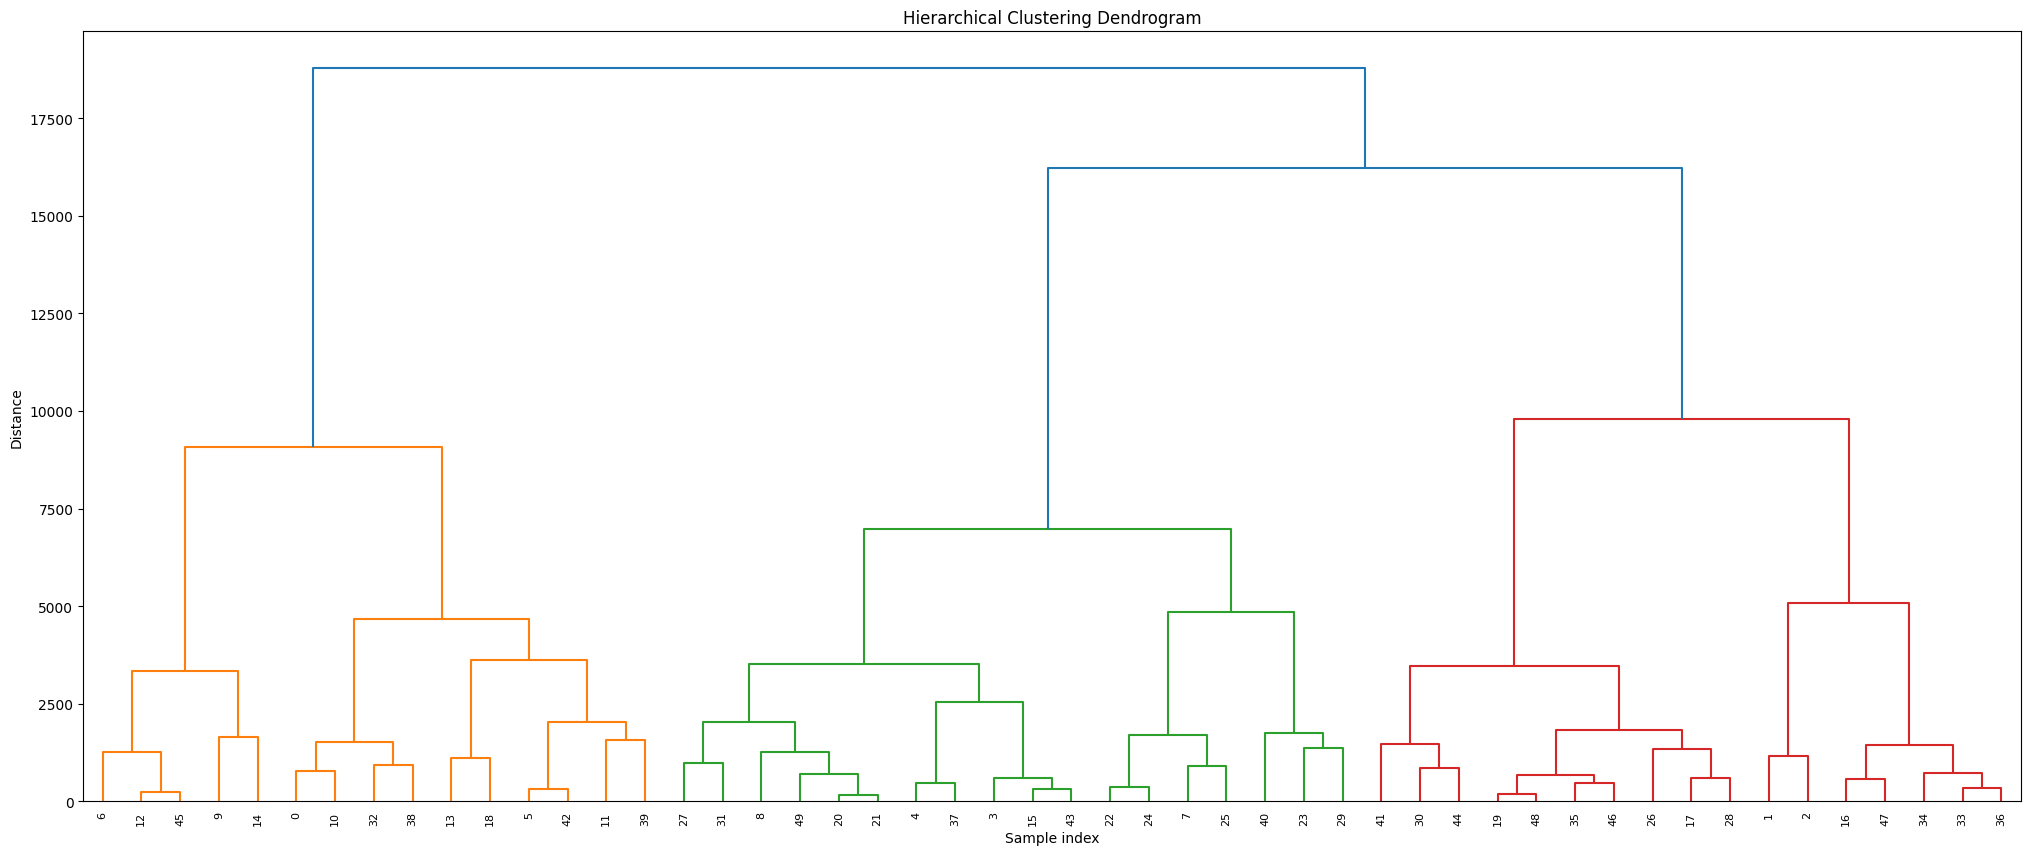

Cluster assignments: [ 6 44 45 26 22 12  3 29 21  4  7 14  1 10  5 24 46 41 11 37 18 19 27 31
 28 30 43 16 42 32 34 17  8 48 50 39 49 23  9 15 33 36 13 25 35  2 40 47
 38 20]


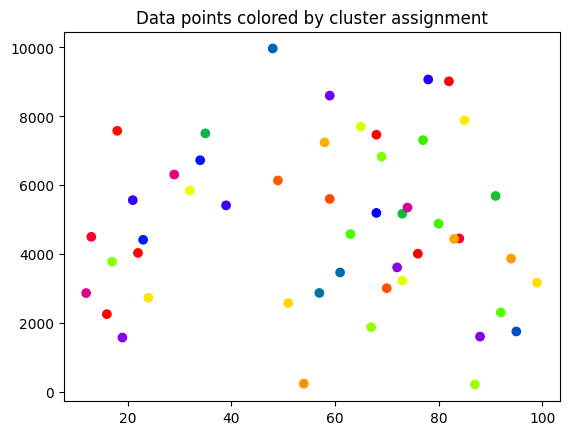

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Assuming we have our dataset ready
X = X_clustering  # The data set prepared for clustering

# Perform hierarchical clustering
Z = linkage(X, method='ward')  # we can change 'ward' to 'single', 'complete', 'average', etc.

# Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Choose a height (distance threshold) where we want to cut the dendrogram
# This height determines the number of clusters
height = 50  # we might need to adjust this based on our specific dendrogram

# Create clusters by cutting the dendrogram at the chosen height
clusters = fcluster(Z, height, criterion='distance')

# Print or return the cluster assignments
print("Cluster assignments:", clusters)

# Optionally, plot the data colored by these clusters to visualize them
# (This is just conceptual; actual plotting would depend on our data's dimensions)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism')  # Assume 2D data for illustration
plt.title('Data points colored by cluster assignment')
plt.show()


In [34]:
first_five = X_clustering[:5]

In [35]:
# Initialize the inverse covariance matrix for Mahalanobis distance
IV = np.linalg.inv(np.cov(first_five.T))
print("Pairwise Distances among the first five points:")
# Euclidean distance
print("\nEuclidean Distance:")
for i in range(len(first_five)):
    for j in range(i + 1, len(first_five)):
        print(f"Distance between point {i+1} and point {j+1}:", euclidean_distance(first_five[i], first_five[j]))
# Manhattan distance
print("\nManhattan Distance:")
for i in range(len(first_five)):
    for j in range(i + 1, len(first_five)):
        print(f"Distance between point {i+1} and point {j+1}:", manhattan_distance(first_five[i], first_five[j]))
# Maximum norm
print("\nMaximum Norm Distance:")
for i in range(len(first_five)):
    for j in range(i + 1, len(first_five)):
        print(f"Distance between point {i+1} and point {j+1}:", maximum_norm(first_five[i], first_five[j]))
# Mahalanobis distance
print("\nMahalanobis Distance:")
for i in range(len(first_five)):
    for j in range(i + 1, len(first_five)):
        print(f"Distance between point {i+1} and point {j+1}:", mahalanobis_distance(first_five[i], first_five[j], IV))
# Inner product space (note: typically a similarity, here inverted for demonstration)
print("\nInner Product Space (as negative distance):")
for i in range(len(first_five)):
    for j in range(i + 1, len(first_five)):
        print(f"Distance (negative inner product) between point {i+1} and point {j+1}:", inner_product_distance(first_five[i], first_five[j]))
# Hamming distance
print("\nHamming Distance:")
for i in range(len(first_five)):
    for j in range(i + 1, len(first_five)):
        # Ensure data is suitable for Hamming distance or convert to categorical/binary as needed
        print(f"Distance between point {i+1} and point {j+1}:", hamming_distance(first_five[i], first_five[j]))


Pairwise Distances among the first five points:

Euclidean Distance:
Distance between point 1 and point 2: 7337.39020360782
Distance between point 1 and point 3: 7453.271831886987
Distance between point 1 and point 4: 6656.699257139382
Distance between point 1 and point 5: 5160.46209171233
Distance between point 2 and point 3: 1165.547939812001
Distance between point 2 and point 4: 5855.353447914139
Distance between point 2 and point 5: 6389.524395446034
Distance between point 3 and point 4: 6886.1716504891165
Distance between point 3 and point 5: 7249.4090793664
Distance between point 4 and point 5: 1770.821843099977

Manhattan Distance:
Distance between point 1 and point 2: 7457
Distance between point 1 and point 3: 8767
Distance between point 1 and point 4: 9653
Distance between point 1 and point 5: 7349
Distance between point 2 and point 3: 1342
Distance between point 2 and point 4: 8178
Distance between point 2 and point 5: 9200
Distance between point 3 and point 4: 9250
Distance 

# Density Clustering


DBSCAN with eps=0.3, min_samples=3:


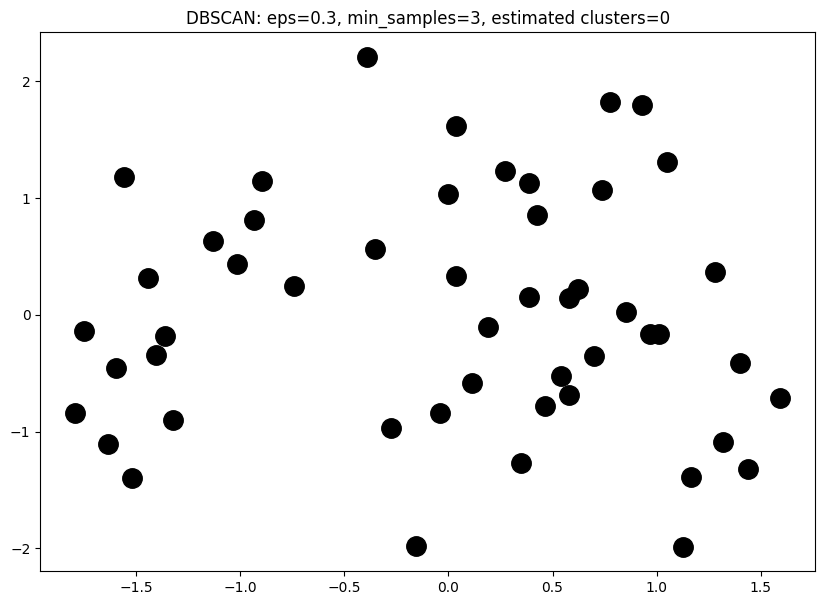


DBSCAN with eps=0.3, min_samples=5:


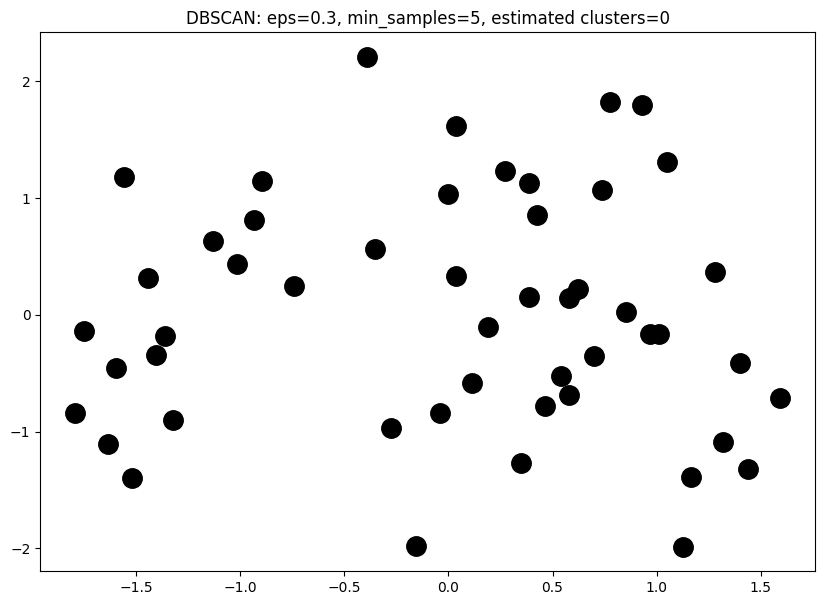


DBSCAN with eps=0.3, min_samples=10:


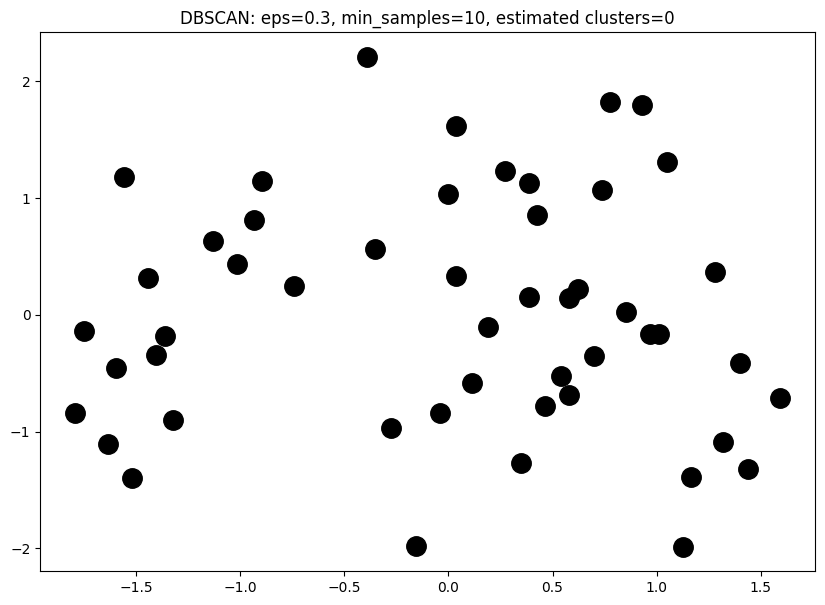


DBSCAN with eps=0.5, min_samples=3:


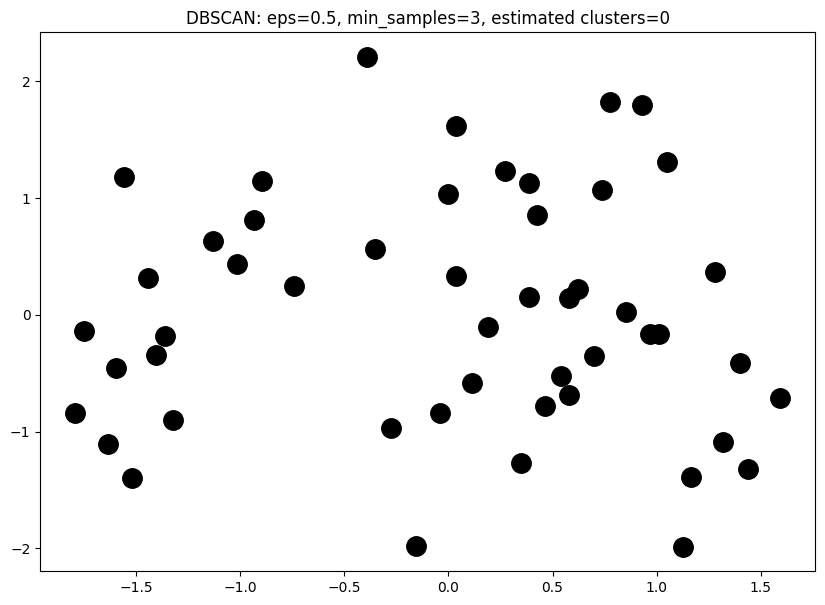


DBSCAN with eps=0.5, min_samples=5:


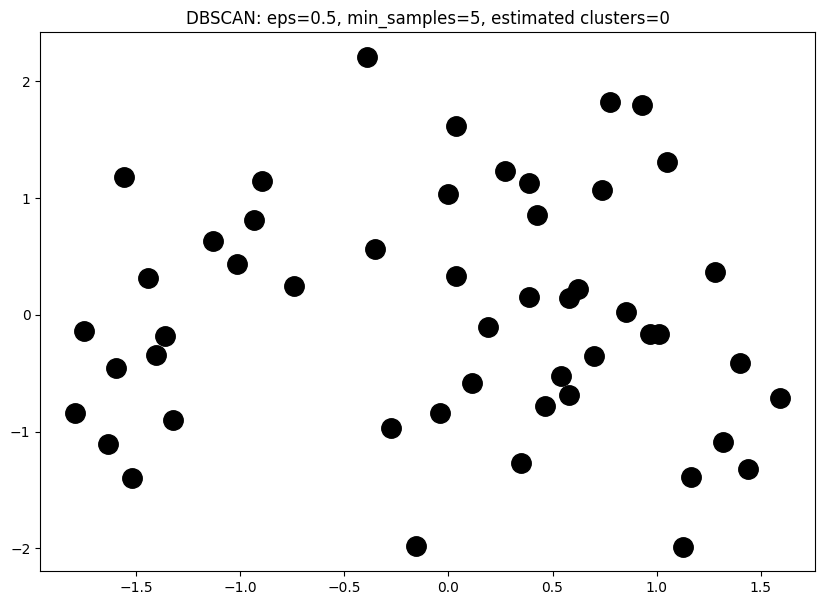


DBSCAN with eps=0.5, min_samples=10:


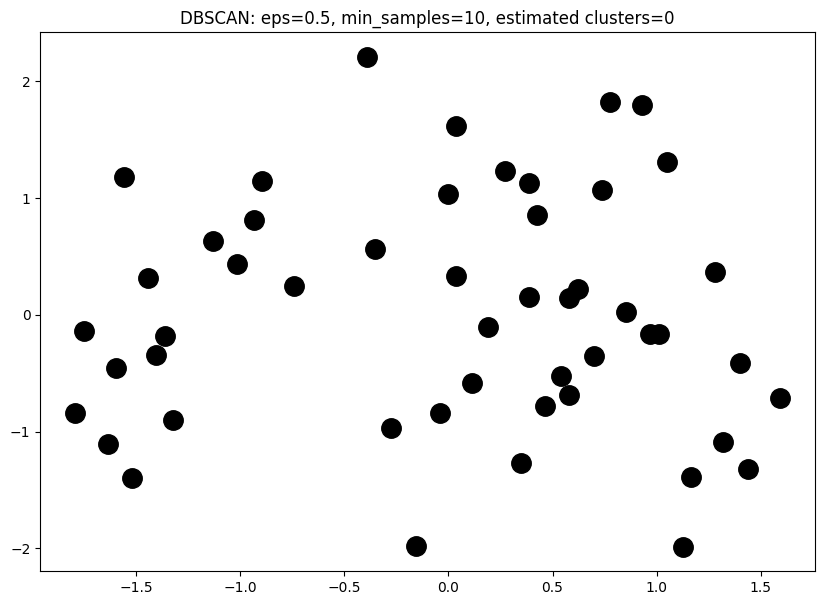


DBSCAN with eps=0.7, min_samples=3:


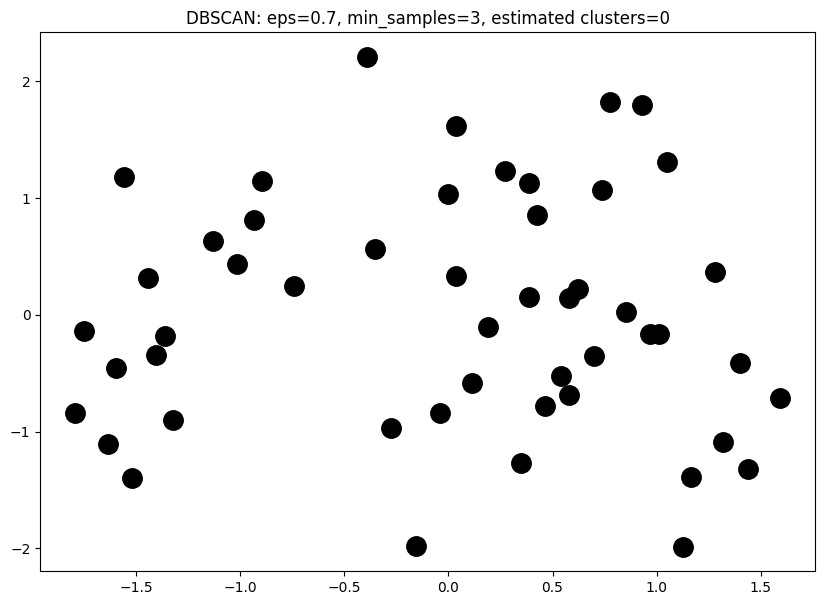


DBSCAN with eps=0.7, min_samples=5:


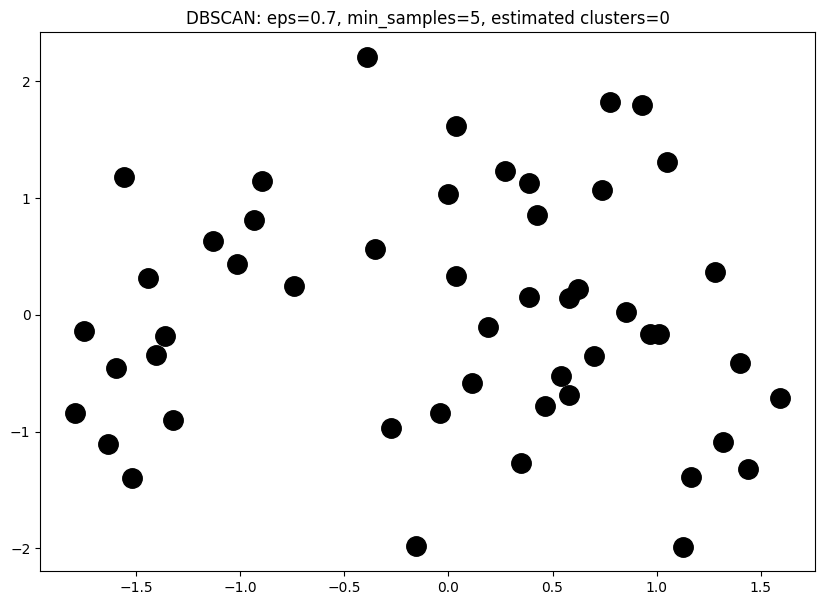


DBSCAN with eps=0.7, min_samples=10:


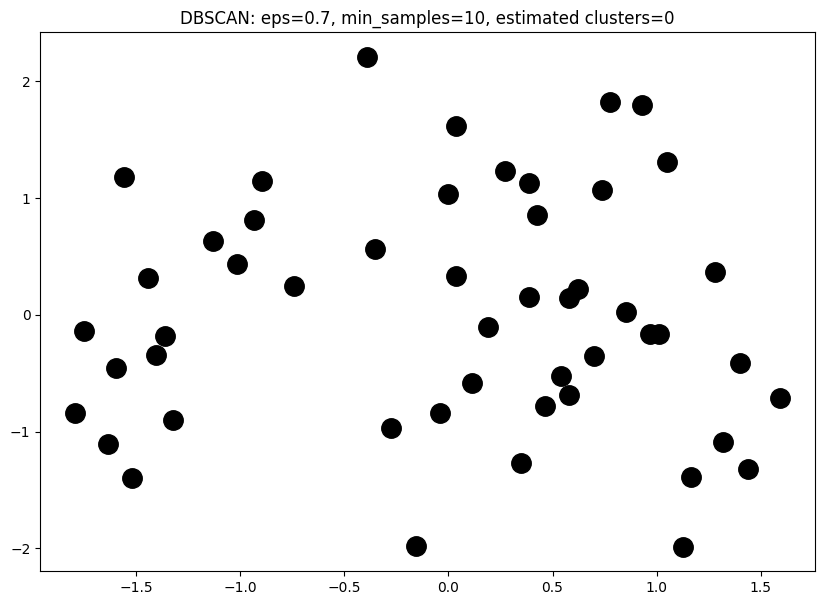


DBSCAN with eps=1, min_samples=3:


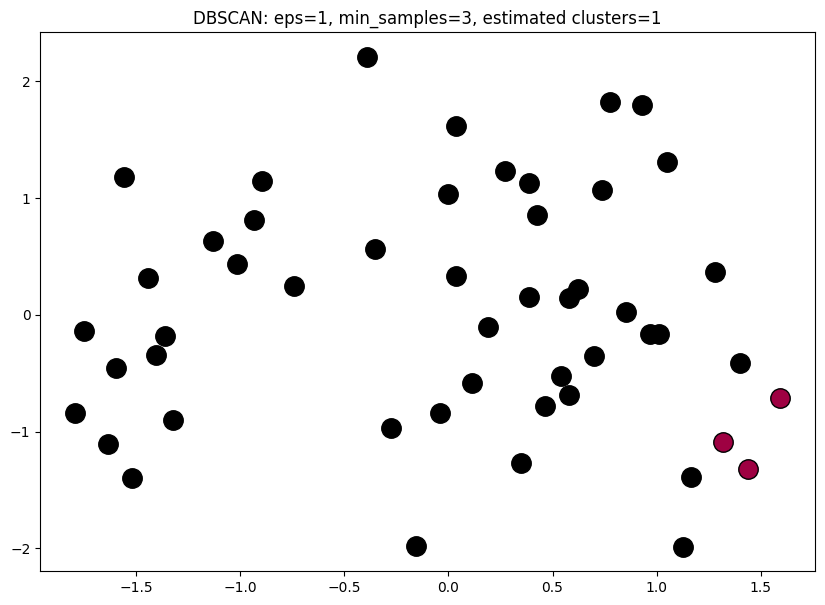


DBSCAN with eps=1, min_samples=5:


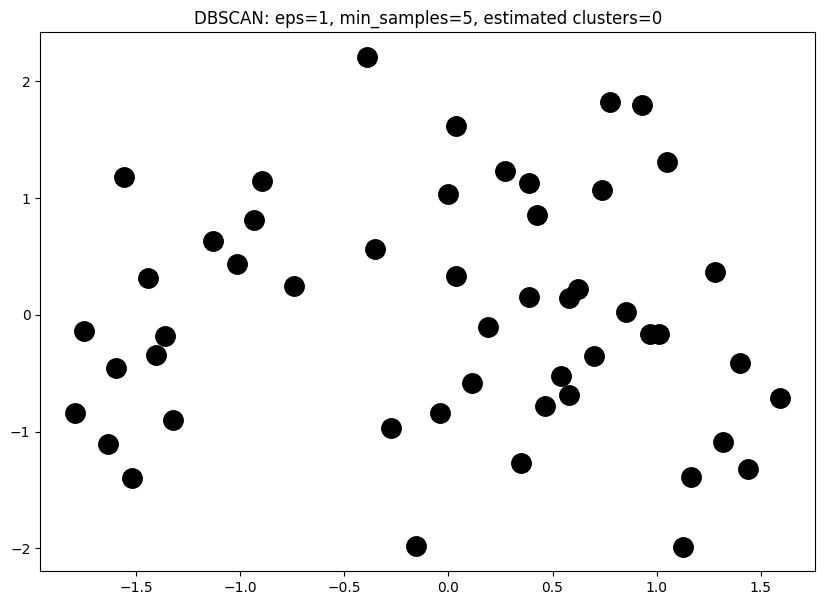


DBSCAN with eps=1, min_samples=10:


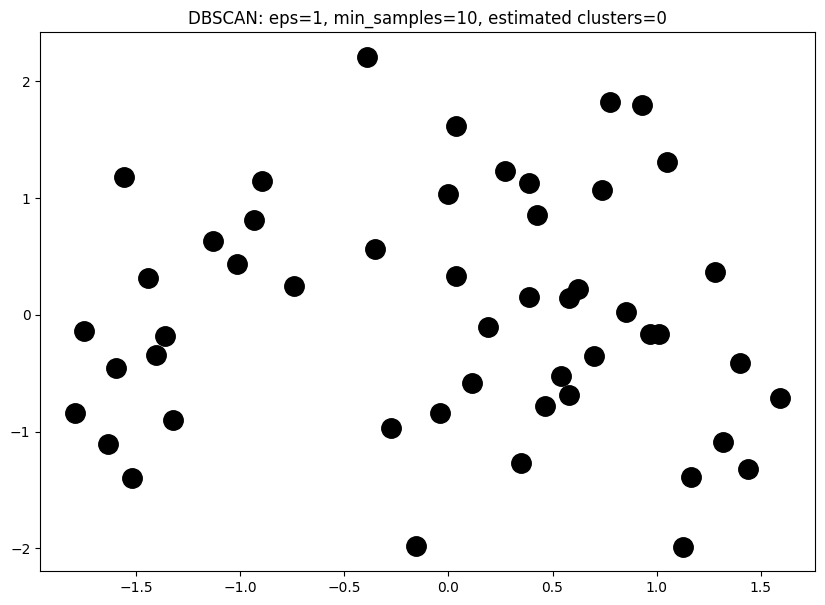


DBSCAN with eps=1.5, min_samples=3:


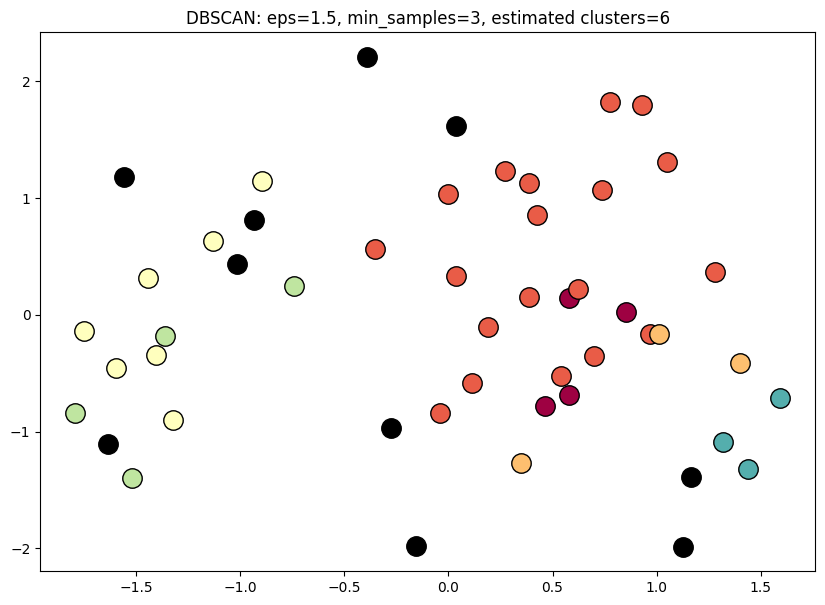


DBSCAN with eps=1.5, min_samples=5:


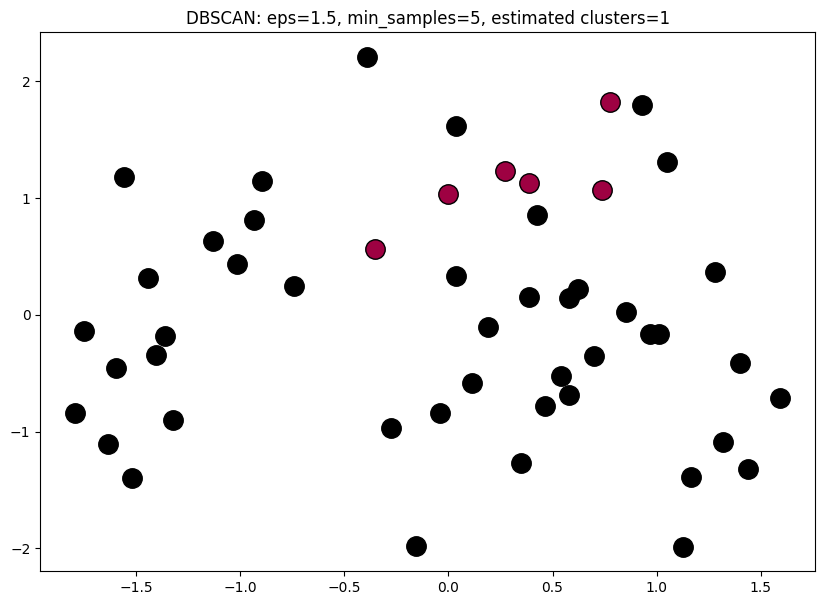


DBSCAN with eps=1.5, min_samples=10:


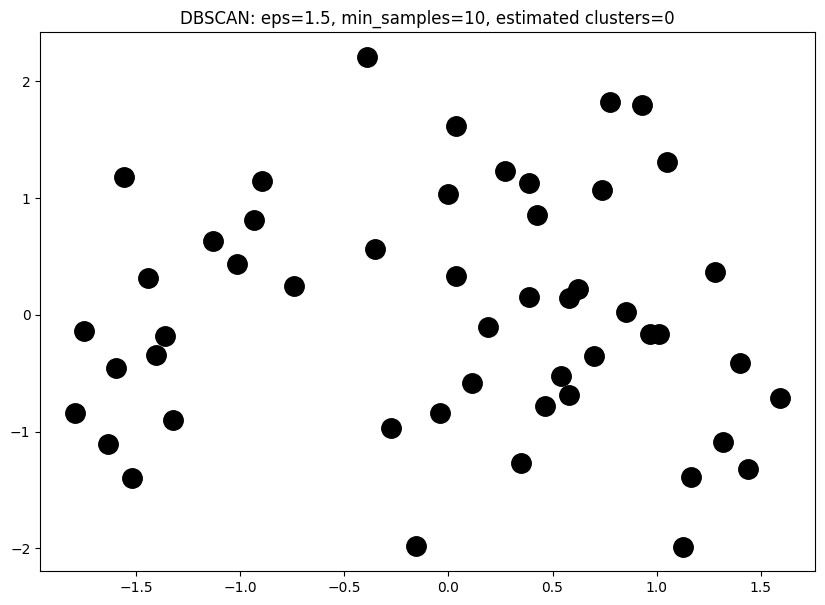


DBSCAN with eps=2, min_samples=3:


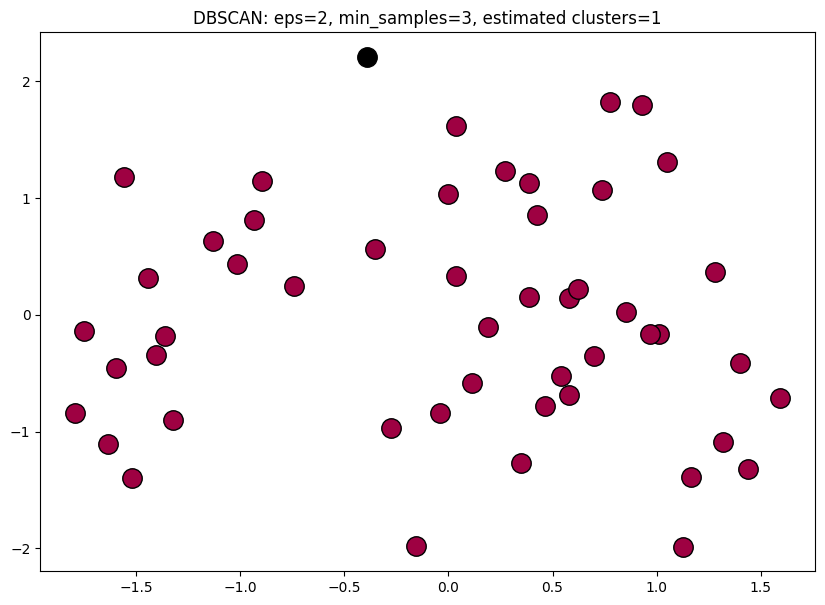


DBSCAN with eps=2, min_samples=5:


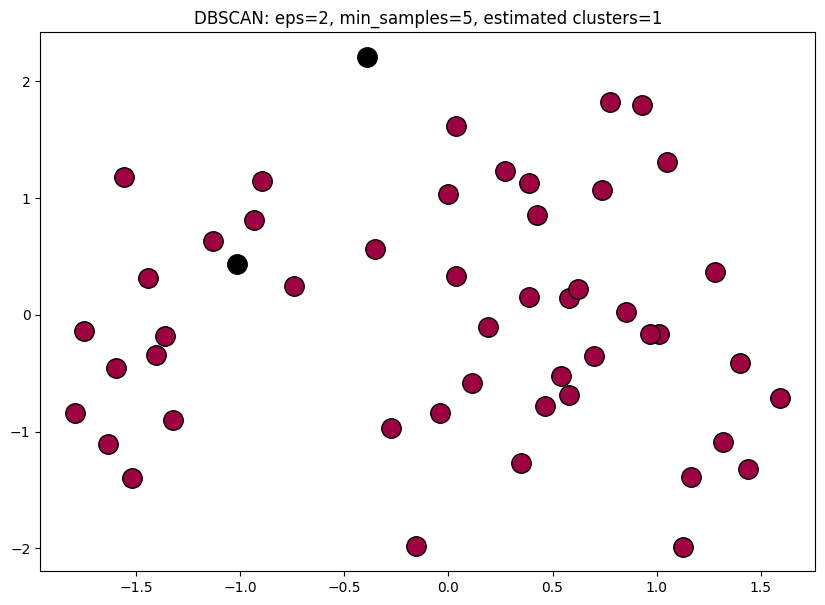


DBSCAN with eps=2, min_samples=10:


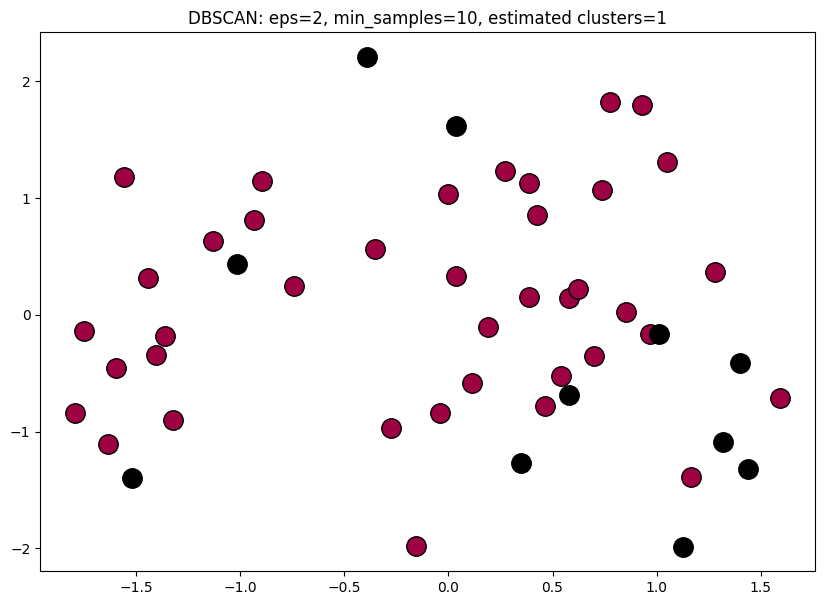

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X_clustering = StandardScaler().fit_transform(X_clustering)

def plot_dbscan(X, eps, min_samples):
    # Fit the DBSCAN algorithm to the data
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Plot result
    plt.figure(figsize=(10, 7))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

    plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}, estimated clusters={n_clusters_}')
    plt.show()

# Run DBSCAN with different parameters to see which gives the best outcome
eps_values = [0.3, 0.5, 0.7, 1, 1.5, 2]  # Adjust these based on the scale of our data
min_samples_values = [3, 5, 10]  # Adjust based on expected cluster density

for eps_val in eps_values:
    for min_samples_val in min_samples_values:
        print(f"\nDBSCAN with eps={eps_val}, min_samples={min_samples_val}:")
        plot_dbscan(X_clustering, eps=eps_val, min_samples=min_samples_val)


In [37]:

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def maximum_norm(x, y):
    return np.max(np.abs(x - y))

def mahalanobis_distance(x, y, IV):
    return np.sqrt((x - y).T @ IV @ (x - y))

def inner_product_distance(x, y):
    return -np.inner(x, y)  # We'll treat higher negative values as greater distances

def hamming_distance(x, y):
    return np.sum(x != y) / len(x)


In [38]:
# Assuming X_clustering is our dataset prepared for clustering
# Calculate the inverse of the covariance matrix for Mahalanobis distance
IV = np.linalg.inv(np.cov(X_clustering.T))

# We'll calculate pairwise distances for the first few pairs to demonstrate
print("Pairwise distances between first five points:")
for i in range(5):
    for j in range(i + 1, 5):
        print(f"Points {i+1} and {j+1}:")
        print(f"  Euclidean distance: {euclidean_distance(X_clustering[i], X_clustering[j])}")
        print(f"  Manhattan distance: {manhattan_distance(X_clustering[i], X_clustering[j])}")
        print(f"  Maximum norm: {maximum_norm(X_clustering[i], X_clustering[j])}")
        print(f"  Mahalanobis distance: {mahalanobis_distance(X_clustering[i], X_clustering[j], IV)}")
        print(f"  Inner product space: {inner_product_distance(X_clustering[i], X_clustering[j])}")
        print(f"  Hamming distance: {hamming_distance(X_clustering[i], X_clustering[j])}\n")


Pairwise distances between first five points:
Points 1 and 2:
  Euclidean distance: 3.5832068123569165
  Manhattan distance: 5.87341013341858
  Maximum norm: 3.1577787339818135
  Mahalanobis distance: 3.4456741285488097
  Inner product space: -1.168841021966098
  Hamming distance: 1.0

Points 1 and 3:
  Euclidean distance: 4.750923659581489
  Manhattan distance: 8.74178624940373
  Maximum norm: 3.168108117873808
  Mahalanobis distance: 4.454628939252262
  Inner product space: 1.804476961315031
  Hamming distance: 1.0

Points 1 and 4:
  Euclidean distance: 4.452359555330527
  Manhattan distance: 9.397464908945203
  Maximum norm: 2.45406946218697
  Mahalanobis distance: 4.238942255263846
  Inner product space: 4.065486093491458
  Hamming distance: 1.0

Points 1 and 5:
  Euclidean distance: 4.070928801124368
  Manhattan distance: 8.350221278488982
  Maximum norm: 2.412512726504981
  Mahalanobis distance: 4.110817641479207
  Inner product space: 1.8113206888528095
  Hamming distance: 1.0



# Partitional Clustering: K-Means++

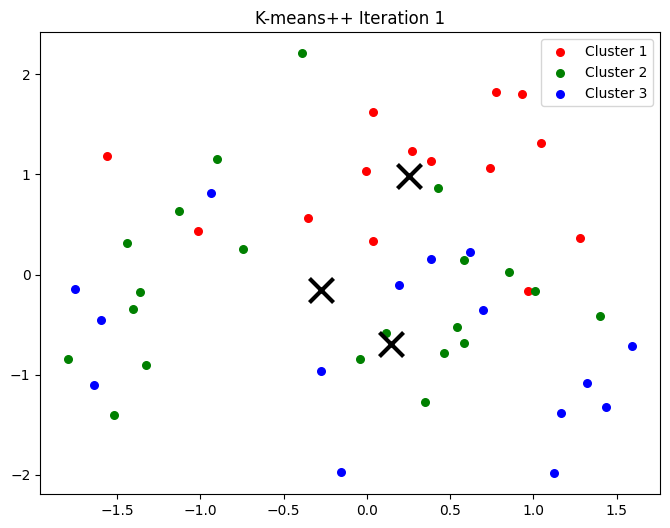

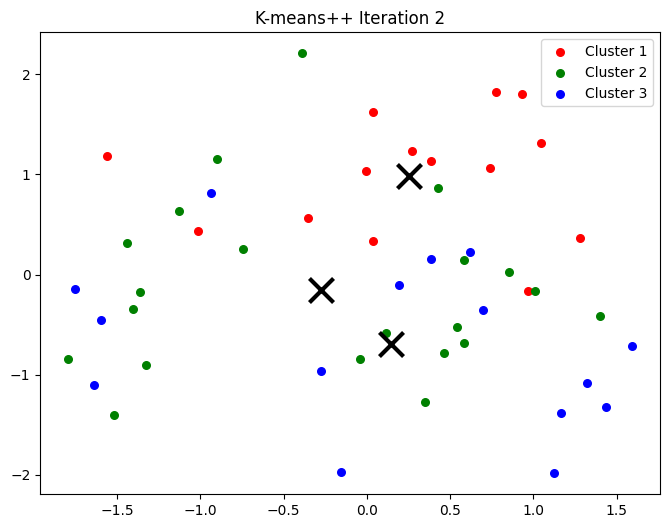

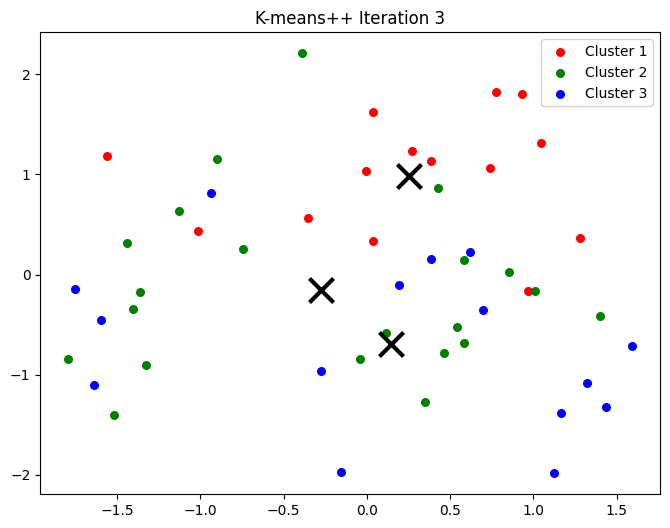

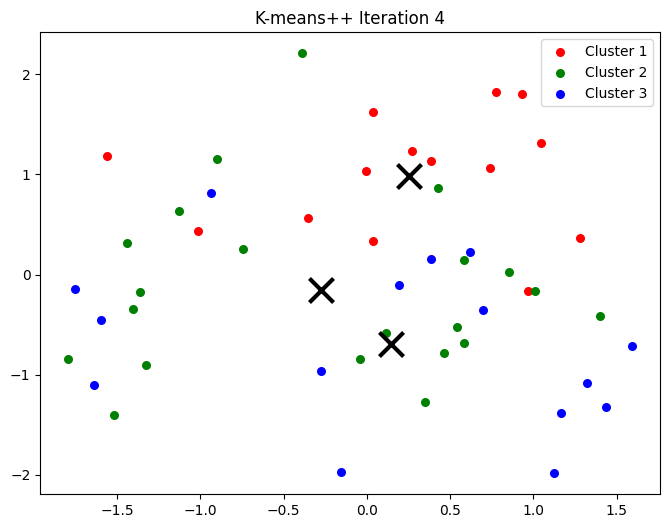

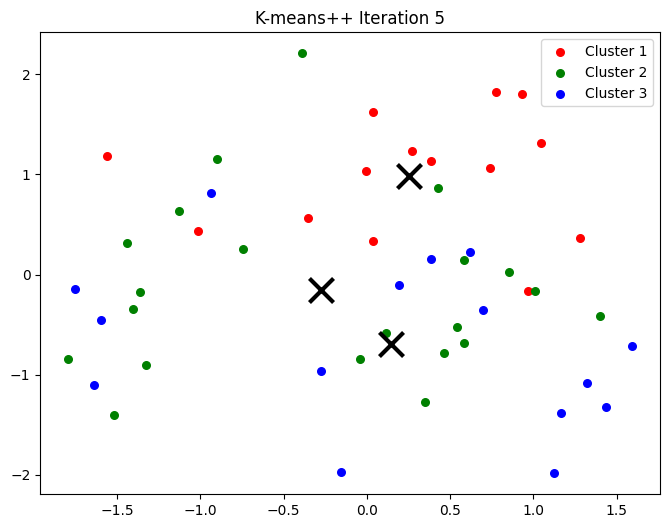

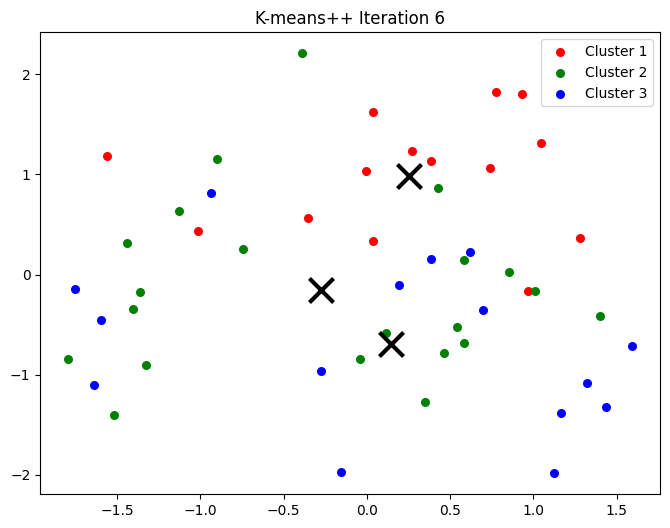

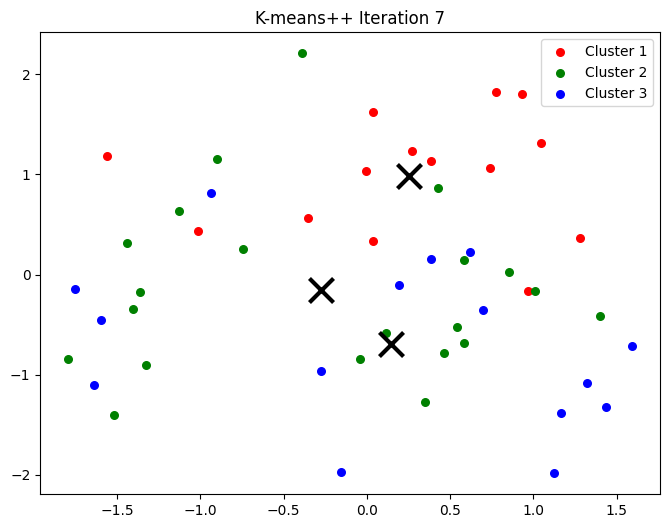

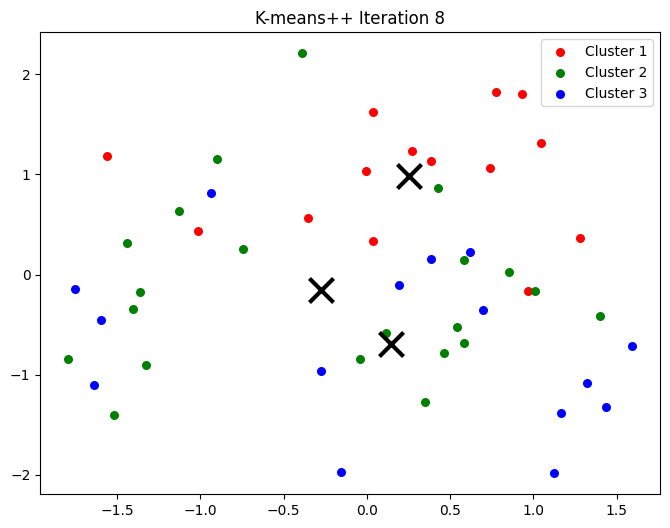

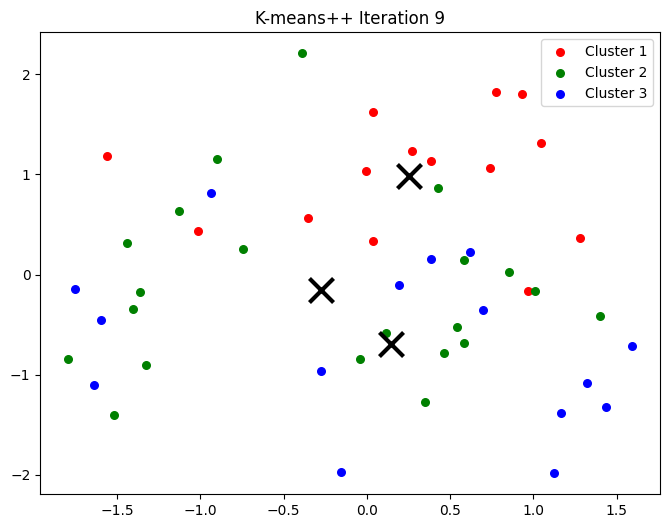

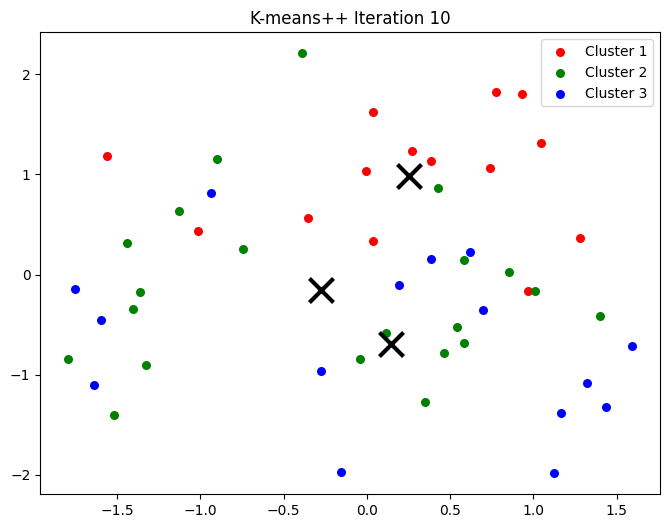

In [39]:

from sklearn.cluster import KMeans



def kmeans_plusplus(X, num_clusters=3, max_iter=10):
    # Initialize KMeans with K-means++ initialization
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=max_iter, n_init=10, random_state=0)
    kmeans.fit(X)
    
    for iteration in range(max_iter):
        # Assign clusters
        labels = kmeans.predict(X)
        
        # Plotting
        plt.figure(figsize=(8, 6))
        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        for i in range(num_clusters):
            cluster_points = X[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
            plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], s=300, c='black', marker='x', linewidths=3)
        
        plt.title(f'K-means++ Iteration {iteration + 1}')
        plt.legend()
        plt.show()

    return kmeans.cluster_centers_, labels

# Apply K-means++ to your data
centroids, labels = kmeans_plusplus(X_clustering, num_clusters=3, max_iter=10)


# K Modes

In [40]:
def kmodes(X, num_clusters=3, max_iter=10):
    km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, max_iter=max_iter)
    clusters = km.fit_predict(X)
    
    # Plot the cluster memberships
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i, label in enumerate(set(clusters)):
        plt.scatter(X[clusters == label, 0], X[clusters == label, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
    plt.title('K-modes Clustering')
    plt.legend()
    plt.show()
    
    return km.cluster_centroids_, clusters

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes



# Scaling and PCA are not typically used for K-modes, but for demonstration:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)  # Scaling

pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
X_pca = pca.fit_transform(X_scaled)  # Apply PCA

# Assuming min_limit and max_limit are defined; for demonstration, let's auto-calculate these
min_limit_x, max_limit_x = np.min(X_pca[:,0]), np.max(X_pca[:,0])
min_limit_y, max_limit_y = np.min(X_pca[:,1]), np.max(X_pca[:,1])

plt.figure(figsize=(12, 8))  # Make the plot larger
plt.scatter(X_pca[:, 0], X_pca[:, 1])  # Visualize PCA-transformed data
plt.xlim([min_limit_x, max_limit_x])
plt.ylim([min_limit_y, max_limit_y])
plt.title('Data after PCA')
plt.show()

# For actual K-modes (assuming we want to apply it to original or categorically transformed data):
X_categorical = X_clustering.astype(str)  # This conversion isn't meaningful after PCA and scaling, shown for continuity

# Apply K-modes to our original or transformed categorical data
centroids, labels = kmodes(X_categorical, num_clusters=3, max_iter=100)


ModuleNotFoundError: No module named 'kmodes'

# Hierarchical approach : Agnes

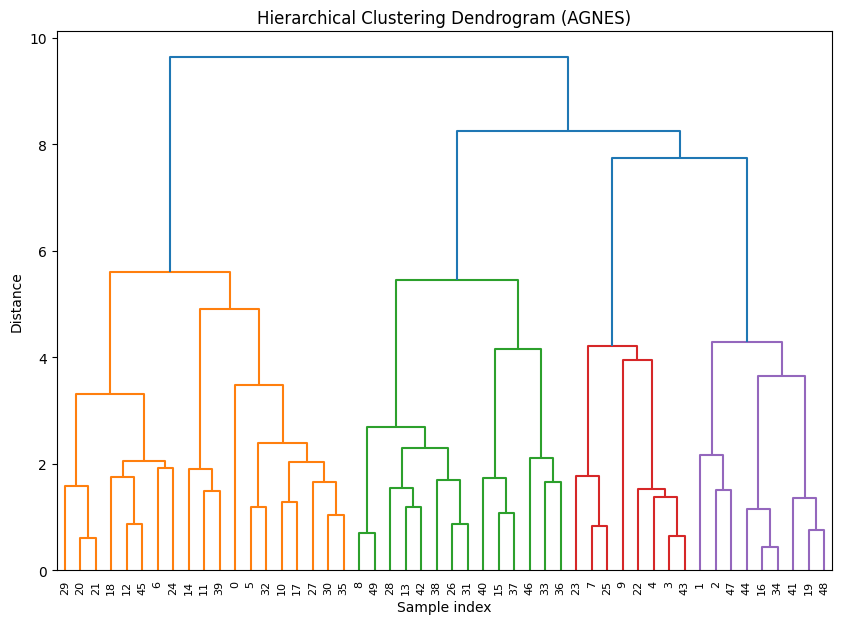

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical/agglomerative clustering
Z = linkage(X_clustering, method='ward')  # We can change 'ward' to 'single', 'complete', etc.

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (AGNES)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


# Hierarchical approach : Diana 

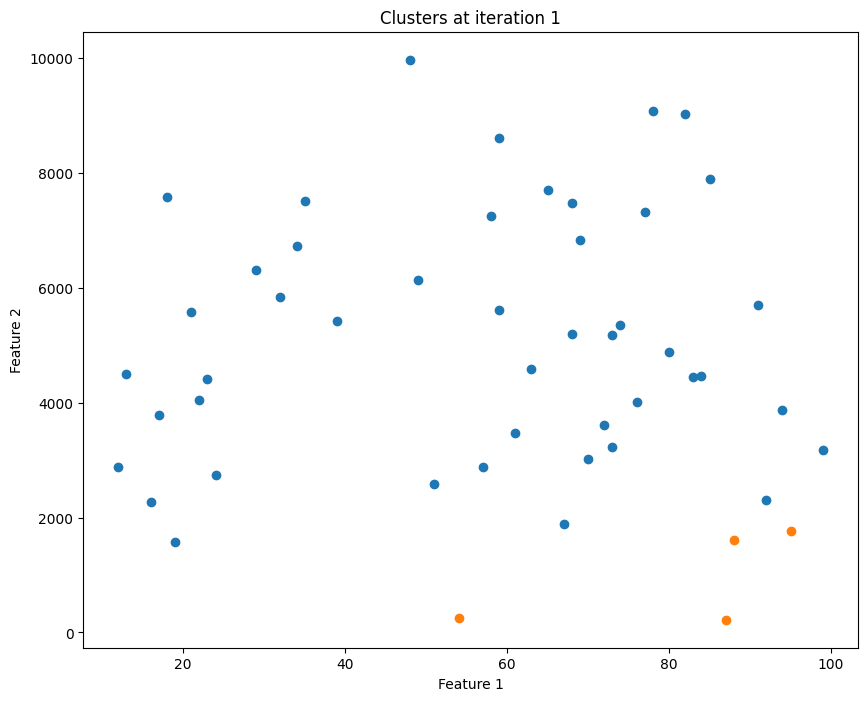

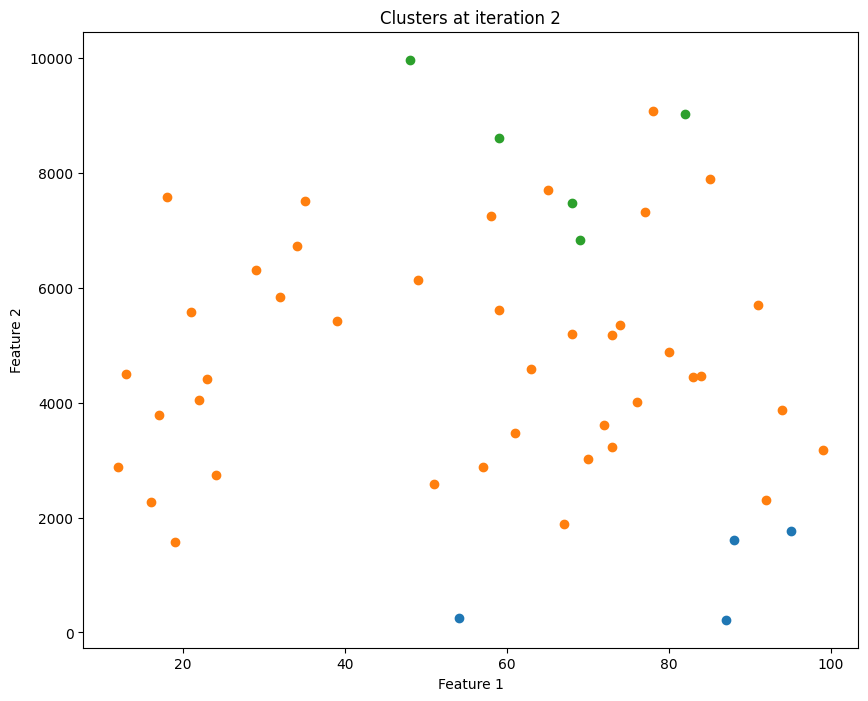

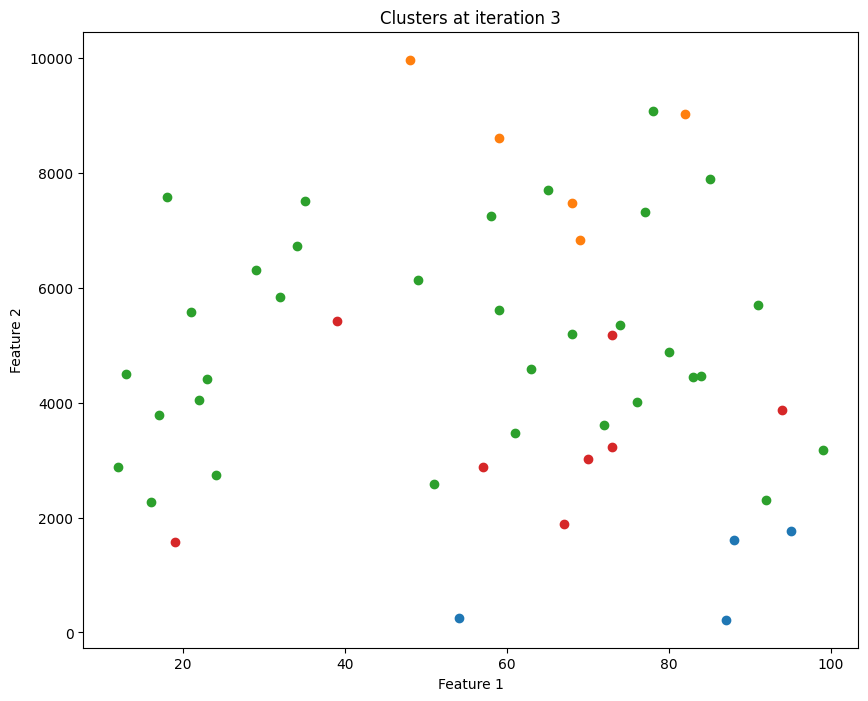

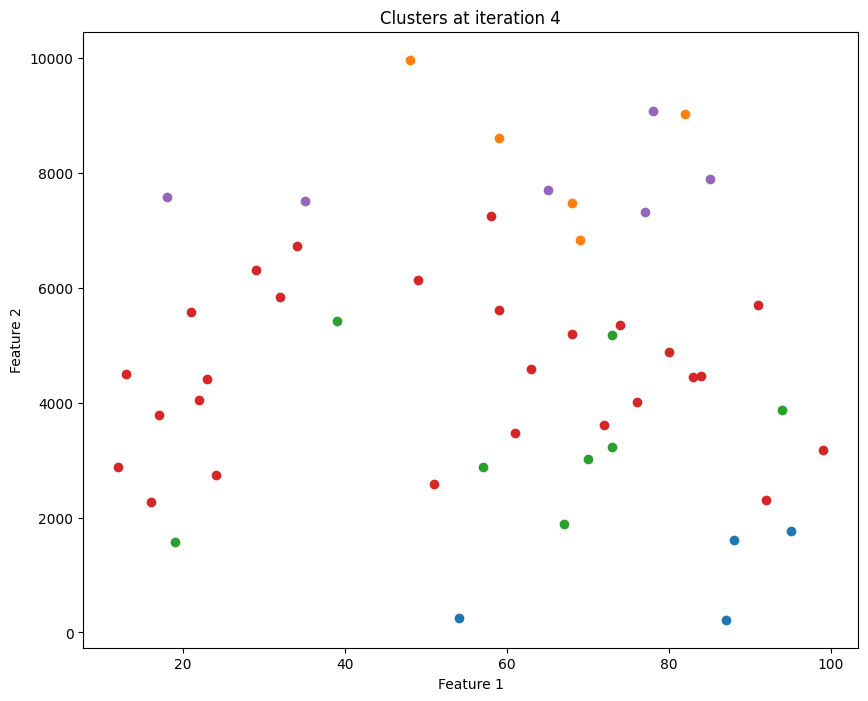

In [44]:
from scipy.spatial.distance import cdist

def plot_clusters(clusters, iteration):
    plt.figure(figsize=(10, 8))
    for cluster in clusters:
        plt.scatter(cluster[:, 0], cluster[:, 1])
    plt.title(f'Clusters at iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def find_furthest_point(cluster, centroid):
    distances = cdist(cluster, [centroid], metric='euclidean').flatten()
    return np.argmax(distances)

def split_cluster(cluster):
    if len(cluster) <= 2:
        return [cluster]
    centroid = np.mean(cluster, axis=0)
    furthest_idx = find_furthest_point(cluster, centroid)
    furthest_point = cluster[furthest_idx]

    distances_to_centroid = cdist(cluster, [centroid], metric='euclidean').flatten()
    distances_to_furthest = cdist(cluster, [furthest_point], metric='euclidean').flatten()

    group1 = cluster[distances_to_centroid <= distances_to_furthest]
    group2 = cluster[distances_to_centroid > distances_to_furthest]

    return [group1, group2]

def diana_clustering(X, max_clusters):
    clusters = [X]
    iteration = 0
    while len(clusters) < max_clusters:
        iteration += 1
        largest_cluster_idx = np.argmax([len(cluster) for cluster in clusters])
        cluster_to_split = clusters.pop(largest_cluster_idx)
        new_clusters = split_cluster(cluster_to_split)
        clusters.extend(new_clusters)

        # Plot the state of the clusters at this iteration
        plot_clusters(clusters, iteration)
    
    return clusters

# Assuming X is your dataset loaded from 'clustering.csv' and prepared similarly to previous examples
# Example usage
clusters = diana_clustering(X, max_clusters=5)


# Evaluation

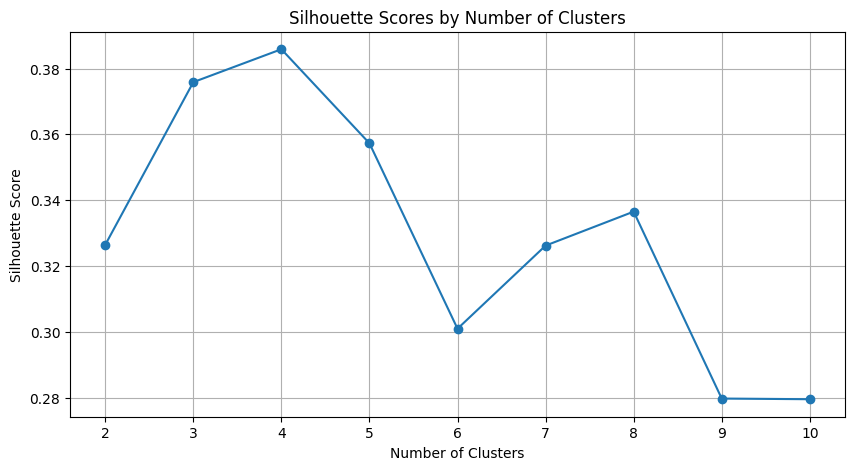

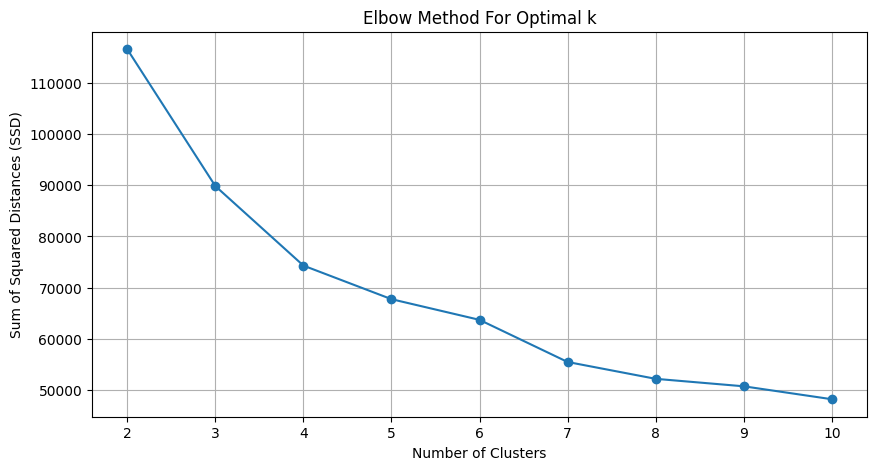

Optimal number of clusters based on silhouette scores: 4
Optimal number of clusters based on the Elbow method: 3


In [47]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Function for Partitional Clustering
def partitional_clustering(X, num_clusters=3, max_iter=10):
    np.random.seed(42)  # For reproducibility
    indices = np.random.choice(X.shape[0], num_clusters, replace=False)
    centroids = X[indices, :]
    labels = np.zeros(X.shape[0], dtype=int)
    
    for iteration in range(max_iter):
        changes = 0
        for i, xi in enumerate(X):
            distances = [np.linalg.norm(xi - centroid) for centroid in centroids]
            new_label = np.argmin(distances)
            if labels[i] != new_label:
                changes += 1
            labels[i] = new_label
        
        for i in range(num_clusters):
            if np.any(labels == i):  # Check if there are points assigned to the cluster
                centroids[i] = np.mean(X[labels == i], axis=0)
        
        if changes == 0:
            break  # Exit loop if no labels changed
    
    return labels, centroids

# Load your dataset
dataset_path=(r"/Users/bharatbishnoi/Desktop/clustering.csv")
clustering_data = pd.read_csv(dataset_path)
X = clustering_data.drop('ID  ', axis=1).values

# Evaluate clustering with silhouette scores and Elbow method
silhouette_scores = []
ssd = []
K = range(2, 11)  # Example range for the number of clusters

for k in K:
    labels, centroids = partitional_clustering(X, num_clusters=k, max_iter=100)
    silhouette_avg = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    silhouette_scores.append(silhouette_avg)
    ssd.append(np.sum([np.linalg.norm(X[labels == i] - centroid, axis=1).sum() for i, centroid in enumerate(centroids)]))

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Plot SSD for Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, ssd, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()
# Print Optimal `k` values after the plots in your existing code:

# Silhouette method
optimal_k_silhouette = K[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on silhouette scores: {optimal_k_silhouette}')

# Elbow method
ssd_diff = np.diff(ssd)  # Compute differences between successive SSD values
ssd_diff2 = np.diff(ssd_diff)  # Compute second order differences
elbow_k = K[np.argmax(ssd_diff2) + 1]  # Determine 'k' at the largest second derivative
print(f'Optimal number of clusters based on the Elbow method: {elbow_k}')


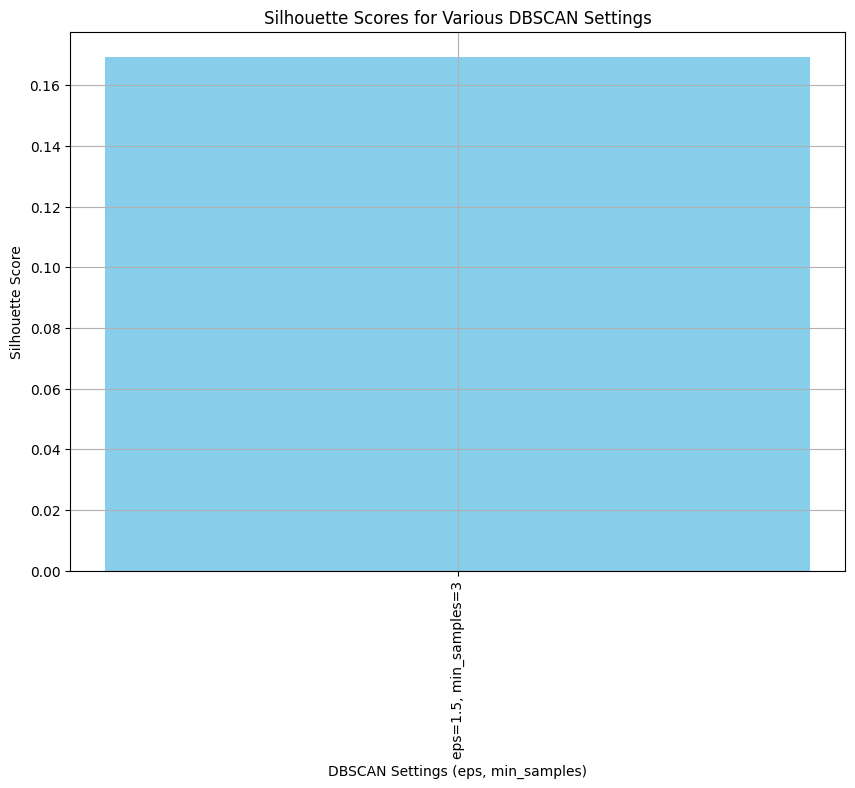

Optimal DBSCAN settings based on silhouette score: eps = 1.5, min_samples = 3


In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming X_clustering is preprocessed
X_clustering = StandardScaler().fit_transform(X)  # Standardize features

# Initialize lists to store results
silhouette_scores = []
settings = []  # To store parameter combinations that yield valid clusters

# Define ranges for DBSCAN parameters
eps_values = [0.3, 0.5, 0.7, 1, 1.5, 2]
min_samples_values = [3, 5, 10]

# Evaluate DBSCAN for different combinations of eps and min_samples
for eps_val in eps_values:
    for min_samples_val in min_samples_values:
        # Apply DBSCAN
        db = DBSCAN(eps=eps_val, min_samples=min_samples_val).fit(X_clustering)
        labels = db.labels_
        
        # Check if the clustering is valid before computing silhouette score
        if len(set(labels)) - (1 if -1 in labels else 0) > 1:  # More than one cluster excluding noise
            silhouette_avg = silhouette_score(X_clustering, labels)
            silhouette_scores.append(silhouette_avg)
            settings.append((eps_val, min_samples_val))
        else:
            # Skip silhouette score but still record the settings
            settings.append((eps_val, min_samples_val))
            silhouette_scores.append(None)  # Representing invalid or undefined score due to poor clustering

# Plot Silhouette Scores (excluding None values for clarity)
valid_scores = [score for score in silhouette_scores if score is not None]
valid_settings = [settings[i] for i, score in enumerate(silhouette_scores) if score is not None]

plt.figure(figsize=(10, 7))
plt.bar(range(len(valid_scores)), valid_scores, color='skyblue')
plt.xticks(range(len(valid_scores)), labels=[f"eps={eps}, min_samples={min_samples}" for eps, min_samples in valid_settings], rotation=90)
plt.title('Silhouette Scores for Various DBSCAN Settings')
plt.xlabel('DBSCAN Settings (eps, min_samples)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
# Assuming X_clustering is preprocessed and the rest of your DBSCAN exploration code is as provided

# Calculate and print the optimal values
if valid_scores:  # Check if there are any valid scores
    optimal_index = np.argmax(valid_scores)  # Get the index of the highest silhouette score
    optimal_eps, optimal_min_samples = valid_settings[optimal_index]
    print(f'Optimal DBSCAN settings based on silhouette score: eps = {optimal_eps}, min_samples = {optimal_min_samples}')
else:
    print("No valid DBSCAN settings were found that form more than one cluster excluding noise.")


Optimal number of clusters (Agglomerative) based on silhouette scores: 8


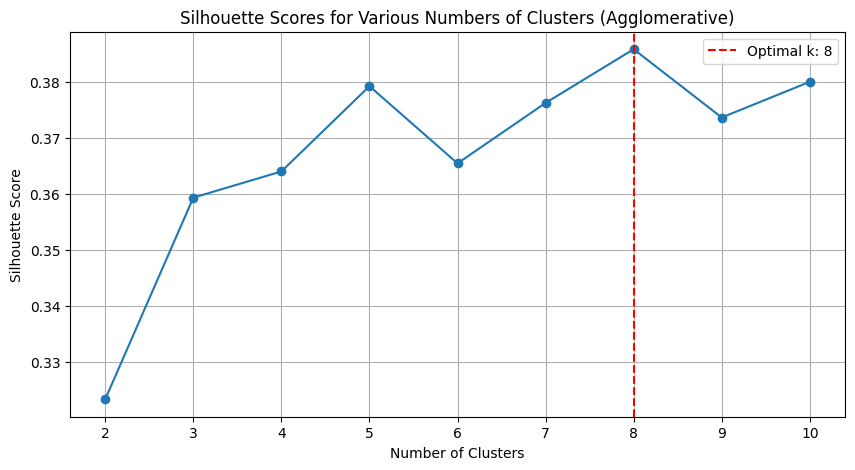

In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
# Assuming X is your pre-processed dataset

# Determine the range of clusters to evaluate
K = range(2, 11)

# Store average silhouette scores
silhouette_scores_agg = []

# Calculate silhouette scores for different values of k
for k in K:
    clusterer = AgglomerativeClustering(n_clusters=k)
    labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores_agg.append(silhouette_avg)

# Find the optimal number of clusters based on silhouette score
optimal_k_silhouette = K[np.argmax(silhouette_scores_agg)]
print(f'Optimal number of clusters (Agglomerative) based on silhouette scores: {optimal_k_silhouette}')

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores_agg, 'o-')
plt.title('Silhouette Scores for Various Numbers of Clusters (Agglomerative)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', label=f'Optimal k: {optimal_k_silhouette}')
plt.legend()
plt.grid(True)
plt.show()
